Write MATLAB Code for the following problem A sinusoidal signal of frequency 𝑓0 = 104/2𝜋 Hz is sampled at the rate of 8 kHz and then applied to a sample-and-hold circuit to produce a flat-topped PAM signal s(t) with pulse duration 𝑇 = 500 𝜇𝑠.

(a) Compute the waveform of the PAM signal s(t)
(b) Compute |𝑆(𝑓)|, denoting the magnitude spectrum of the PAM signal s(t).
(c) Compute the envelop of |𝑆(𝑓)|. Hence confirm that the frequency at which this envelop goes 
through zero for the first time is equal to 20 kHz.

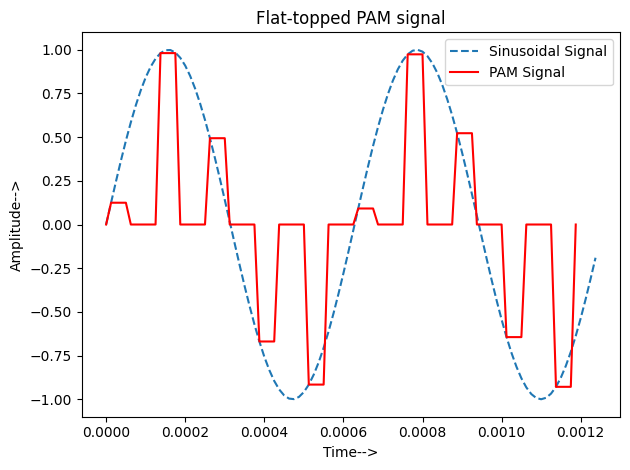

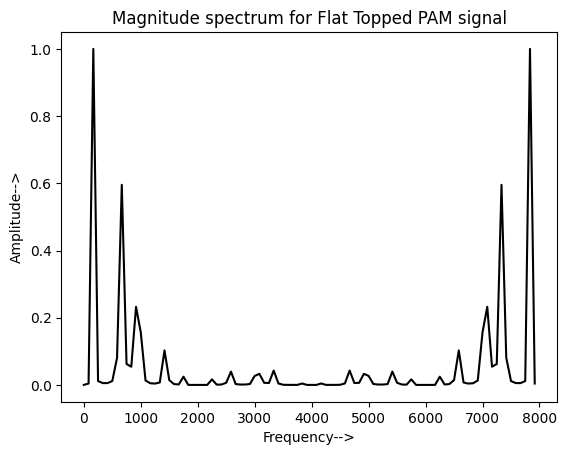

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 8000                       #sampling frequency 
ts = 1 / fs                     #sampling period
pulse_dur = 5e-5                #Pulse width
td = 1.25e-5                    #sampling period of signal
fd = 80000                      #sampling frequency of pulse
t = np.arange(0, 100*td, td)    #points to plot the curve
fm = 10000                      #Message Frequency
s = np.sin(fm * t)              #Message signal

# The below function is to calculate the PAM for the given signal
def PAM(s, td, ts, pulse_dur):
    potd = int(pulse_dur / td)
    tsotd = int(ts / td)
    y = np.zeros(len(s))
    tt = np.arange(1, len(s), tsotd)
    for kk in tt:
        y[int(kk):int(kk)+potd] = s[int(kk)] * np.ones(potd)
    return y[:len(s) - potd]

Pam_s = PAM(s, td, ts, pulse_dur)

plt.figure(1)
plt.plot(t, s, '--')                            #Ploting of the sinusoidal signal
plt.plot(t[:len(Pam_s)], Pam_s,color = 'red')   #Plotting of the PAM signal
plt.title('Flat-topped PAM signal')
plt.legend(['Sinusoidal Signal', 'PAM Signal'], loc = 'upper right')
plt.xlabel('Time-->')
plt.ylabel('Amplitude-->')
plt.tight_layout()
plt.show()

A = (np.abs(np.fft.fft(Pam_s))**2)              #Finding the FFT plot for the Amplitude plot in frequency domain
A = A / np.max(A)                               #Normalising the AMplitude Values
f = np.arange(0, len(A)) * fs / len(A)

plt.figure(2)
plt.plot(f, A, color = 'Black')                 #ploting of magnitude spectrum
plt.title('Magnitude spectrum for Flat Topped PAM signal')
plt.xlabel('Frequency-->')
plt.ylabel('Amplitude-->')
plt.show()